# PyTorch AutoGrad

In [1]:
import torch

In [2]:
x = torch.FloatTensor([[1, 2],
                       [3, 4]]).requires_grad_(True) # 이 x라는 FloatTensor는 미분에 참가할거다!

In [3]:
x1 = x + 2
x2 = x - 2
x3 = x1 * x2  # element-wise 연산
y = x3.sum()  # y = x3의 element들의 합

print(x1)
print(x2)
print(x3)
print(y)

tensor([[3., 4.],
        [5., 6.]], grad_fn=<AddBackward0>)
tensor([[-1.,  0.],
        [ 1.,  2.]], grad_fn=<SubBackward0>)
tensor([[-3.,  0.],
        [ 5., 12.]], grad_fn=<MulBackward0>)
tensor(14., grad_fn=<SumBackward0>)


In [4]:
y.backward() # 스칼라인 y를 requires_grad_(True)인 걸로 미분한다! 
# 주의! backward()는 스칼라에만 적용 가능한 메서드!

$$\begin{gathered}
x=\begin{bmatrix}
x_{(1,1)} & x_{(1,2)} \\
x_{(2,1)} & x_{(2,2)}
\end{bmatrix}\\
\\
x_1=x+2 \\
x_2=x-2 \\
\\
\begin{aligned}
x_3&=x_1\times{x_2} \\
&=(x+2)(x-2) \\
&=x^2-4
\end{aligned} \\
\\
\begin{aligned}
y&=\text{sum}(x_3) \\
&=x_{3,(1,1)}+x_{3,(1,2)}+x_{3,(2,1)}+x_{3,(2,2)}
\end{aligned} \\
\\
\text{x.grad}=\begin{bmatrix}
\frac{\partial{y}}{\partial{x_{(1,1)}}} & \frac{\partial{y}}{\partial{x_{(1,2)}}} \\
\frac{\partial{y}}{\partial{x_{(2,1)}}} & \frac{\partial{y}}{\partial{x_{(2,2)}}}
\end{bmatrix} \\
\\
\frac{dy}{dx}=2x
\end{gathered}$$

위에서 dy/dx는 오타임. 원래는 d 대신에 편미분 기호가 들어가야 함

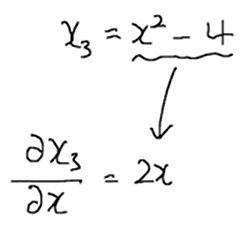

In [5]:
# Remind: 스칼라인 y를 행렬 x로 미분한 결과는 행렬
print(x.grad)  # x_3을 x로 편미분 한 결과가 2x니까 x.grad 결과를 보면 원래 행렬 x * 2한 결과가 나옴

tensor([[2., 4.],
        [6., 8.]])


In [6]:
print(x)

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


In [7]:
x3.numpy()  # x3를 numpy 행렬로 바꿔보는 시도

RuntimeError: Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead.

x3는 .grad가 포함된 (x3.grad 실행해보면 값이 나옴) tensor라서 x3.numpy()는 바로 안 되고 아래와 같이 x3.detach_().numpy()를 해야 넘파이의 array 형태로 변형 가능

In [ ]:
x3.grad

In [8]:
x3.detach_().numpy()

array([[-3.,  0.],
       [ 5., 12.]], dtype=float32)